In [2]:
import matplotlib.pyplot as plt

class Tour:
    class Node:
        def __init__(self, p):
            self.p = p
            self.next = None

    def __init__(self):
        self.first = None
    
    def show(self):
        current = self.first
        while current.next != self.first:
            print(current.p)
            current = current.next
        print(current.p)
    
    def draw(self):
        current = self.first
        while current.next != self.first:
            self.draw_connections(current)
            current = current.next
        self.draw_connections(current)
    
    def draw_connections(self, node):
        current = self.first
        while current != node:
            current.p.drawTo(node.p)
            current = current.next
    
    def distance(self):
        total_distance = 0.0
        current = self.first
        while current.next != self.first:
            total_distance += current.p.distanceTo(current.next.p)
            print("Traversing from", current.p.label, "to", current.next.p.label)
            current = current.next
        total_distance += current.p.distanceTo(self.first.p)
        print("Traversing from", current.p.label, "to", self.first.p.label)
        return total_distance
    
    def insert_smallest(self, p):
        if self.first is None:
            new_node = Tour.Node(p)
            new_node.next = new_node
            self.first = new_node
            return
        
        best_node = None
        min_increase = float("inf")

        current = self.first
        while True:
            increase = (
                current.p.distanceTo(p)
                + p.distanceTo(current.next.p)
                - current.p.distanceTo(current.next.p)
            )
            if increase < min_increase:
                best_node = current
                min_increase = increase
            current = current.next
            if current == self.first:
                break
        
        new_node = Tour.Node(p)
        new_node.next = best_node.next
        best_node.next = new_node
        self.first = new_node

    def insert_nearest(self, p):
        new_node = Tour.Node(p)
        if self.first is None:
            new_node.next = new_node
            self.first = new_node
            return
        
        closest_node = None
        min_distance = float("inf")

        current = self.first
        while True:
            distance = current.p.distanceTo(p)
            if distance < min_distance:
                closest_node = current
                min_distance = distance
            current = current.next
            if current == self.first:
                break
        
        new_node.next = closest_node.next
        closest_node.next = new_node
    
    def plot_tour(self):
        x = []
        y = []
        labels = []
        current = self.first
        while True:
            x.append(current.p.x)
            y.append(current.p.y)
            labels.append(current.p.label)
            current = current.next
            if current == self.first:
                break

        x.append(self.first.p.x)
        y.append(self.first.p.y)
        labels.append(self.first.p.label)

        plt.plot(x, y, 'ro')
        for i, label in enumerate(labels):
            plt.text(x[i], y[i], label, ha='center', va='center')
        
        self.draw()
        
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Meshed Graph')
        plt.grid(True)
        plt.show()



J: (1, 4)
F: (1, 4)
G: (1, 4)
A: (0, 2)
B: (1, 2)
H: (4, 0)
C: (2, 3)
D: (3, 4)
E: (3, 3)
I: (1, 4)
Traversing from J to F
Traversing from F to G
Traversing from G to A
Traversing from A to B
Traversing from B to H
Traversing from H to C
Traversing from C to D
Traversing from D to E
Traversing from E to I
Traversing from I to J
Total distance using smallest_increase Insertion: 15.097452068300655
A: (0, 2)
B: (1, 2)
C: (2, 3)
F: (1, 4)
J: (1, 4)
I: (1, 4)
G: (1, 4)
E: (3, 3)
H: (4, 0)
D: (3, 4)
Traversing from A to B
Traversing from B to C
Traversing from C to F
Traversing from F to J
Traversing from J to I
Traversing from I to G
Traversing from G to E
Traversing from E to H
Traversing from H to D
Traversing from D to A
Total distance using nearest_neigbor: 16.95542966349601


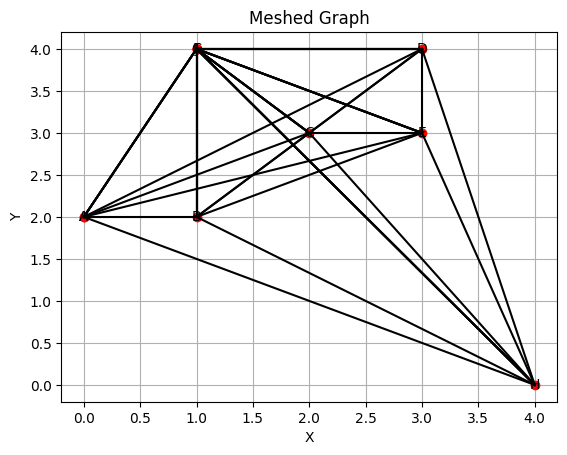

In [6]:
class Point:
    def __init__(self, x, y, label):
        self.x = x
        self.y = y
        self.label = label

    def distanceTo(self, other):
        return ((self.x - other.x) ** 2 + (self.y - other.y) ** 2) ** 0.5

    def drawTo(self, other):
        plt.plot([self.x, other.x], [self.y, other.y], 'k-')

    def __str__(self):
        return f"{self.label}: ({self.x}, {self.y})"

points = [
    Point(0, 2, "A"),
    Point(1, 2, "B"),
    Point(2, 3, "C"),
    Point(3, 4, "D"),
    Point(3, 3, "E"),
    Point(1, 4, "F"),
    Point(1, 4, "G"),
    Point(4, 0, "H"),
    Point(1, 4, "I"),
    Point(1, 4, "J")
]

tour = Tour()

for point in points:
    tour.insert_smallest(point)

tour.show()
print("Total distance using smallest_increase Insertion:", tour.distance())

tour = Tour()

for point in points:
    tour.insert_nearest(point)

tour.show()
print("Total distance using nearest_neigbor:", tour.distance())

tour.plot_tour()

End